Vitesse du ventilateur: 64.13498893533325


C:\Users\LENOVO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


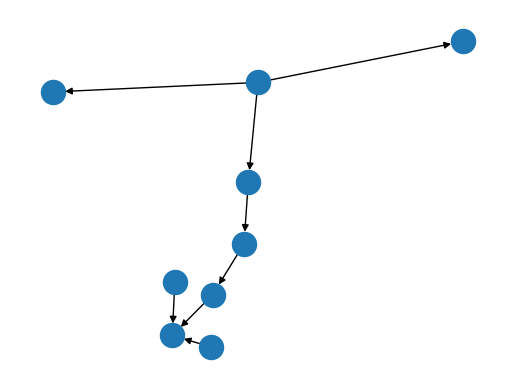

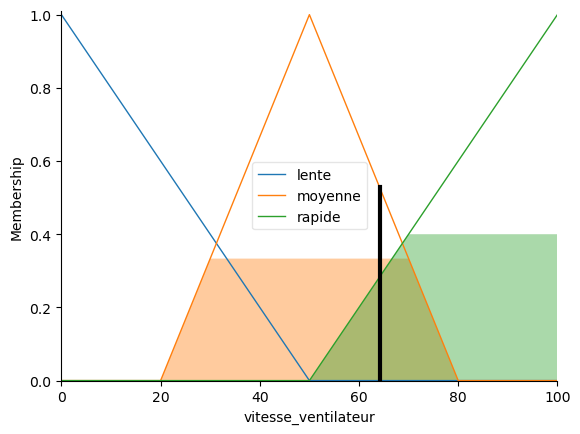

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Définition des variables d'entrée
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')

# Définition des fonctions d'appartenance pour la température
temperature['froid'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['moyen'] = fuzz.trimf(temperature.universe, [20, 50, 80])
temperature['chaud'] = fuzz.trimf(temperature.universe, [50, 100, 100])

# Définition de la variable de sortie
vitesse_ventilateur = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse_ventilateur')

# Définition des fonctions d'appartenance pour la vitesse du ventilateur
vitesse_ventilateur['lente'] = fuzz.trimf(vitesse_ventilateur.universe, [0, 0, 50])
vitesse_ventilateur['moyenne'] = fuzz.trimf(vitesse_ventilateur.universe, [20, 50, 80])
vitesse_ventilateur['rapide'] = fuzz.trimf(vitesse_ventilateur.universe, [50, 100, 100])

# Définition des règles du système
regle1 = ctrl.Rule(temperature['froid'], vitesse_ventilateur['lente'])
regle2 = ctrl.Rule(temperature['moyen'], vitesse_ventilateur['moyenne'])
regle3 = ctrl.Rule(temperature['chaud'], vitesse_ventilateur['rapide'])
regle1.view()
# Création de la base de règles et du système de contrôle
système_ctrl = ctrl.ControlSystem([regle1, regle2, regle3])
contrôleur = ctrl.ControlSystemSimulation(système_ctrl)

# Entrée de la température
contrôleur.input['temperature'] = 70

# Calcul de la vitesse du ventilateur
contrôleur.compute()

# Affichage du résultat
print("Vitesse du ventilateur:", contrôleur.output['vitesse_ventilateur'])
vitesse_ventilateur.view(sim=contrôleur)
